# Preparing the environment

In [1]:
# import all needed packages
import numpy as np
import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

# A) Case study
(see textbook Exercise 3.7.9)

*Information on the dataset*

Gas mileage, horsepower, and other information for 392 vehicles.

A data frame with 392 observations on the following 9 variables.

- `mpg`: miles per gallon
- `cylinders`: Number of cylinders between 4 and 8
- `displacement`: Engine displacement (cu. inches)
- `horsepower`: Engine horsepower
- `weight`: Vehicle weight (lbs.)
- `acceleration`: Time to accelerate from 0 to 60 mph (sec.)
- `year`: Model year (modulo 100)
- `origin`: Origin of car (1. American, 2. European, 3. Japanese)
- `name`: Vehicle name

In [2]:
# run this cell to load the data
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


## Task A.1
Produce a scatterplot matrix which includes all of the variables in the data set.

/tmp/ipykernel_127746/2777637746.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(Auto, ax=ax);


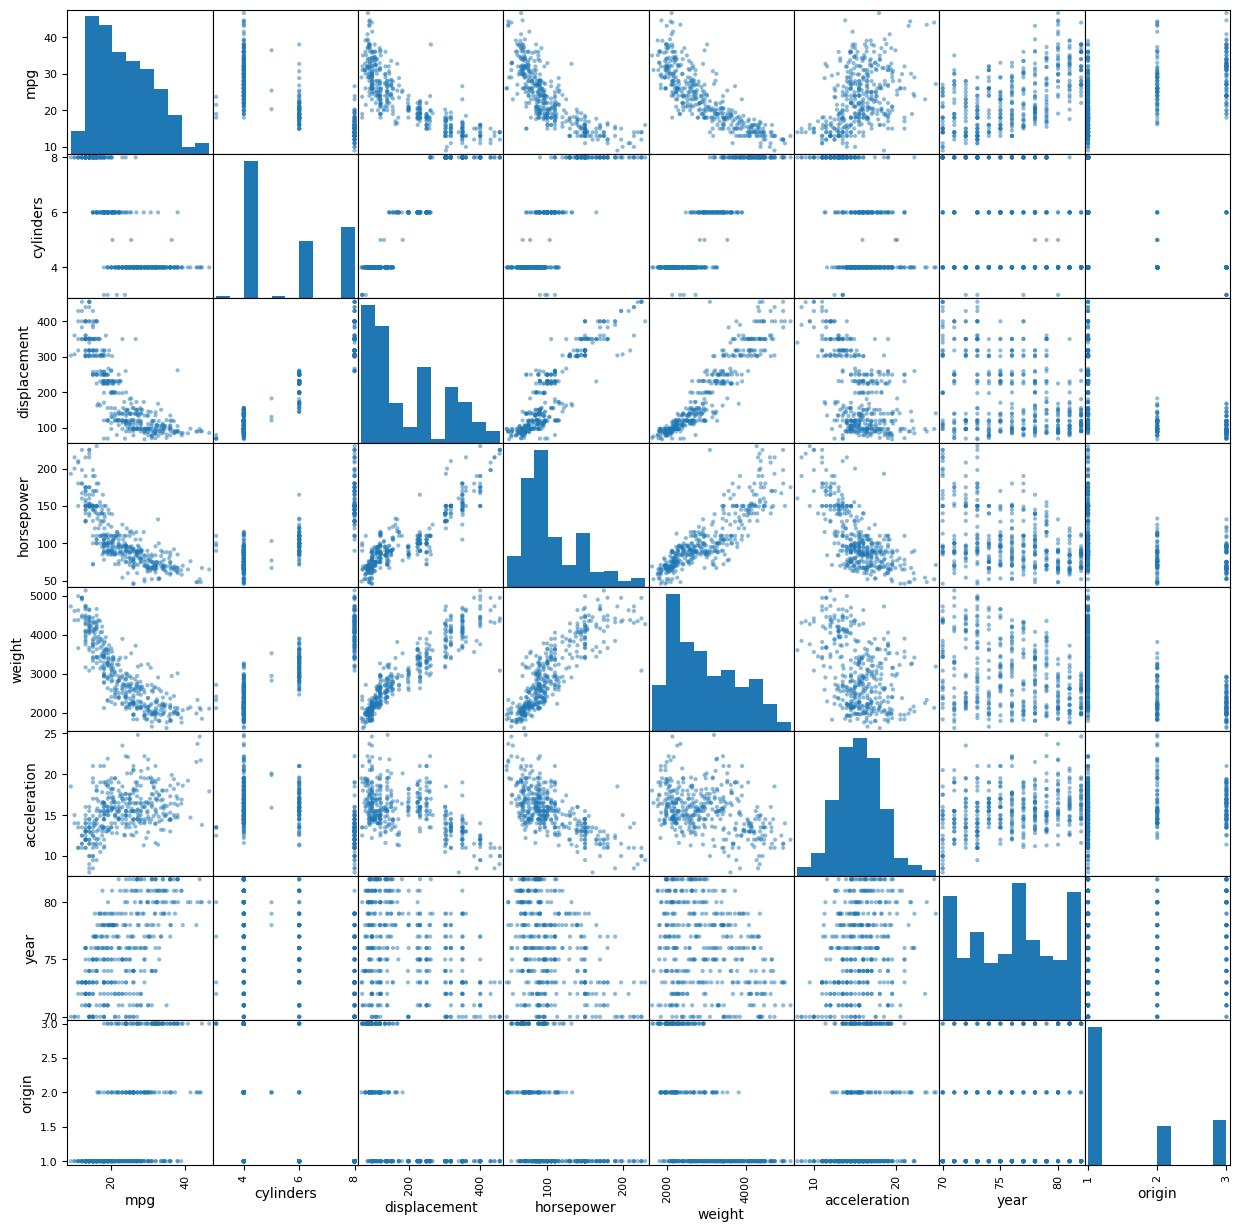

In [4]:
fig, ax = plt.subplots(figsize = (15,15))
pd.plotting.scatter_matrix(Auto, ax=ax);

We observe that all variables seem to be related to `mpg`. This indicates that it might be a good starting point to build a regression model with all possible predictor variables.

## Task A.2
Compute the matrix of correlations between the variables using the `DataFrame.corr()` method.

In [11]:
corrmat = Auto.drop(columns=['name']).corr()
corrmat

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


## Task A.3
Use the `sm.OLS()` function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Use the `summarize()` function to print the results. Comment on the output. For instance:

1. Is there a relationship between the predictors and the response? Use the `summary()` function from statsmodels to answer this question.
2. Which predictors appear to have a statistically significant relationship to the response?
3. What does the coefficient for the `year` variable suggest?

In [16]:
Auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [17]:
# Step 0: Reencode the origin column as "category" datatype instead
# of int64 datatype
Auto = Auto.astype({'origin' : 'category'})
Auto.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year               int64
origin          category
name              object
dtype: object

In [18]:
# Step 1: Preparation of design matrix X
predictors = Auto.columns.drop(['mpg','name'])
predictors

design = MS(predictors)
design.fit(Auto)
X = design.transform(Auto)
X

/opt/tljh/user/lib/python3.9/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/opt/tljh/user/lib/python3.9/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/opt/tljh/user/lib/python3.9/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/opt/tljh/user/lib/

,intercept,cylinders,displacement,horsepower,weight,acceleration,year,origin[2],origin[3]
0,1.0,8,307.0,130,3504,12.0,70,0.0,0.0
1,1.0,8,350.0,165,3693,11.5,70,0.0,0.0
2,1.0,8,318.0,150,3436,11.0,70,0.0,0.0
3,1.0,8,304.0,150,3433,12.0,70,0.0,0.0
4,1.0,8,302.0,140,3449,10.5,70,0.0,0.0
...,...,...,...,...,...,...,...,...,...
387,1.0,4,140.0,86,2790,15.6,82,0.0,0.0
388,1.0,4,97.0,52,2130,24.6,82,1.0,0.0
389,1.0,4,135.0,84,2295,11.6,82,0.0,0.0
390,1.0,4,120.0,79,2625,18.6,82,0.0,0.0


**Remark**: No solution beyond this task as we did not get further in the lecture on May 13. Continuation in the next lecture.

### Analysis of the model
1. Is there a relationship between the predictors and the response? Use the `summary()` function from statsmodels to answer this question.

In [ ]:
# your answer here

2. Which predictors appear to have a statistically significant relationship to the response?

In [ ]:
# your answer here

3. What does the coefficient for the `year` variable suggest?

In [ ]:
#your answer here

## Task A.4
Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

### Residual plot

In [ ]:
# your answer here

- We observe a clear non-linear pattern
- The residuals have a heteroscedastic pattern

### Studentized resdiual plot

In [ ]:
# your answer here

### Influence plot

In [ ]:
#your answer here

**Comments**: We observe that the outliers identified previously are not high-leverage points, so they are not influential.

Ont the other hand, the only observation with really high leverage has a moderate residual.

### VIF table

In [ ]:
# your answer here

**Comments**: This table shows critical VIF values for the variables `cylinders`, `displacement`, `horsepower`and `weight`. 

This confirms our findings from the scatter matrix and from high $p$-values observed above.

## Task A.5
Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

In [ ]:
# your answer here

*Please document your observations here.*

## Task A.6
Try a few different transformations of the variables, such as $log(X)$, $\sqrt{X}$, $X^2$. Comment on your findings.

In [ ]:
# your answer here

*Please document your observations here.*